# Transformers

Consider the following two sentences:  
- She waited at the river ***bank***  
- She was looking at her ***bank*** account  

Under the Glove and Word2Vec embeddings, both of the uses of the word ***bank*** would have the same vector representation.  Which is a problem as the word 'bank' refers to two completely different things based on the context.  Fixed embedding schemes such as Word2Vec can't solve for this.  

Transformer based language models solve for this by creating context specific embeddings.  Which means instead of creating a static word-to-vector embedding, they provide dynamic embeddings depending upon the context.  You provide the model the entire sentence, and it returns an embedding paying attention to all other words in the context of which a word appears.

Transformers use something called an ‘attention mechanism’ to compute the embedding for a word in a sentence by also considering the words adjacent to the given word.  By combining the transformer architecture with self-supervised learning, these models have achieved tremendous success as is evident in the tremendous popularity of large language models.  The transformer architecture has been successfully applied to vision and audio tasks as well, and is currently all the rage to the point of making past deep learning architectures completely redundant.


## Attention is All You Need  

A seminal 2017 paper by Vaswani et al from the Google Brain team introduced and popularized the transformers architecture.  The paper represented a turning point for deep learning practitioners, and transformers were soon applied to solving a wide variety of problems.  The original paper can be downloaded from https://arxiv.org/abs/1706.03762.

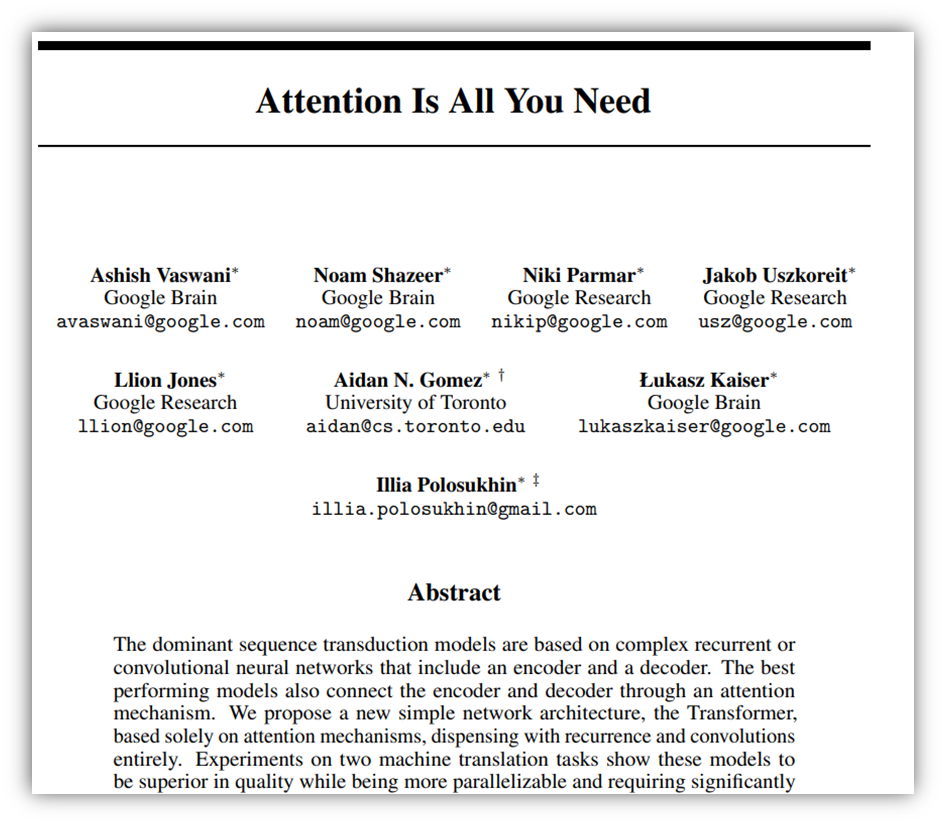

The original paper on transformers makes difficult reading for a non-technical audience.  A more intuitive and simpler explanation of the paper was provided by Jay Alammar in a blog post on GitHub that received immense popularity and accolades.  Jay's blog post is available at https://jalammar.github.io/illustrated-transformer/.

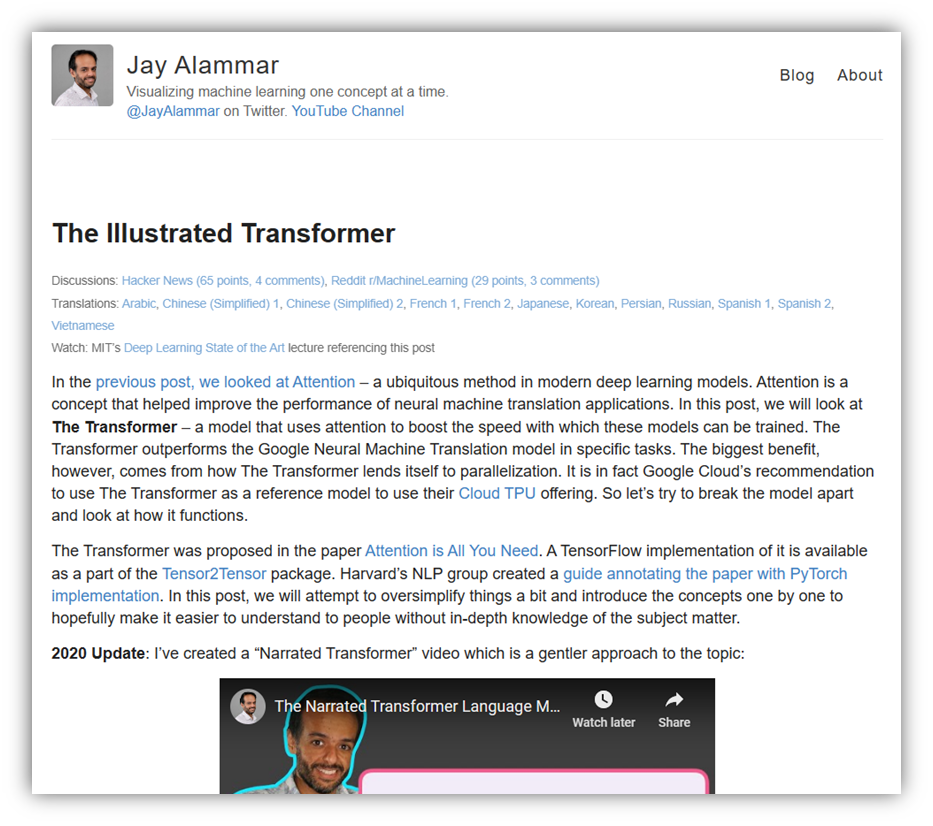

The core idea behind self-attention is to derive embeddings for a word based on the all the words that surround it, including a consideration of the order they appear in.  There is a lot matrix algebra involved, but the essence of the idea is to take into account the presence of other words before and after a given word, and use their embeddings as weights in computing the context sensitive embedding for a given word.

This means the same word would have a different embedding vector when used in different sentences, and the model will need the entire sentence or document as an input to compute the embeddings of the word.  All of these computations end up being compute heavy as the number of weights and biases explodes when compared to a traditional FCNN or RNN.  These transformer models are self-trained on large amounts of text (generally public domain text), and require computational capabilities beyond the reach of the average person.  These new transformer models tend to have billions of parameters, and are appropriately called 'Large Language Models', or LLMs for short.

Large corporations such as Google, Facebook, OpenAI and others have come up with their own LLMs, some of which are open source, and others not.  Models that are not open sourced can be accessed through APIs, which meanse users send their data to the LLM provider (such as OpenAI), and the provider returns the answer.  These providers charge for usage based on the volumes of data they have to process.  

Models that are open sourced can be downloaded in their entirety on the user's infrastructure, and run locally without incremental cost except that of the user's hardware and compute costs.

LLMs come in a few different flavors, and current thinking makes the below distinctions.  However this can change rapidly as ever advanced models are released:  
- Foundational Models – Base models, cannot be used out of the box as not trained for anything other than predicting the next word  
- Instruction Tuned Models – Have been trained to follow instructions  
- Fine-tuned Models – Have been trained on additional text data specific to the user's situation  

The line demarcating the above can be fuzzy and the LLM space is evolving rapidly with different vendors competing to meet their users' needs in the most efficient way.


## Sentence Transformers 
(https://www.sbert.net/)

Sentence BERT is a library that allows the creation of sentence embeddings based on transformer models, including nearly all models available on Huggingface.  A 'sentence' does not mean a literal sentence, it refers to any text.  

Once we have embeddings available, there is no limit to what we can do with it.  We can pass the embeddings to traditional or network based models to drive classification, regression, or perform clustering of text data using any clustering method such as k-means or hierarchical clustering.

We will start with sentence BERT, and look at some examples of the kinds of problems we can solve with it.  

### Get some text data first
We import about 10,000 random articles that were collected using web scraping the net for articles that address cybersecurity.  Some item are long, some are short, and others are not really even articles as those might just be ads or other website notices.  
**Local saving and loading of models**
> Save with:
```
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-roberta-large-v1')

model.save(path)
```
> Load with:
```
from sentence_transformers import SentenceTransformer

model = SentenceTransformer(path)
```


In [ ]:
# Set default locations for downloaded models
# If you are running things on your own hardware,
# you can ignore this cell completely.

# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
# Usual library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch
import gc

In [ ]:
pwd

In [ ]:
# Import the data from a pickle file
df = pd.read_pickle('sample.pkl')

In [ ]:
# How many rows and columns in our dataframe
df.shape

In [ ]:
# We look at the dataframe below.  The column of interest to us is the column titled 'text'
df.head(3)

In [ ]:
# We create a dataframe with just the story text, and call it corpus

corpus = df[['text']]

In [ ]:
corpus

In [ ]:
# Next, we examine how long the articles are.  Perhaps we want to 
# throw out the outliers, ie really short articles, which may 
# not really be articles, and also very long articles.
# 
# We do this below, looking at the mean and distribution of article lengths

article_lengths = [(len(x.split())) for x in (corpus.text)]
article_lengths = pd.Series(article_lengths)
plt.figure(figsize = (14,9))
sns.histplot(article_lengths)
pd.Series(article_lengths).describe()

In [ ]:
# Let us just keep the regular sized articles, ie the middle 50%. We are still 
# left with a sizable number in our corpus.

corpus = corpus[(article_lengths>article_lengths.quantile(.25)) & (article_lengths<article_lengths.quantile(.75))]
len(corpus)

In [ ]:
# Next we look at the distribution again

article_lengths = [(len(x.split())) for x in (corpus.text)]
article_lengths = pd.Series(article_lengths)
plt.figure(figsize = (14,9))
sns.histplot(article_lengths)
pd.Series(article_lengths).describe()

Our code becomes really slow if we use all 9600 articles, so we randomly pick just 100 articles from the corpus.  This is just so we can finish in time with the demos.  When you have more time, you can run the code for all the articles too.

In [ ]:
# We take only a sample of the entire corpus
# If we want to consider the entire set, we do not need to run this cell

corpus = corpus.sample(100)

In [ ]:
# Let us print out a random article

print(corpus.text.iloc[35])

### Embeddings/Feature Extraction

Feature extraction means obtaining the embedding vectors for a given text from a pre-trained model.  Once you have the embeddings, which are numerical representations of text, lots of possibilities open up.  You can compare the similarity between documents, you can use the embeddings to match questions to answers, perform clustering based on any algorithm, use the embeddings as features to create clusters of similar documents, and so on.

**Difference between word embeddings and document embeddings**  
So far, we have been talking of word embeddings, which means we have a large embedding vector for every single word in our text data.  What do we mean when we say sentence or document embedding?  A sentence's embedding is derived from the embeddings for all the words in the sentence.  The embedding vectors are generally averaged ('mean-pooled'), though other techniques such as 'max-pooling' are also available.  It is surprising that we spend so much effort computing separate embeddings for words considering context and word order, and then just mash everything up using an average to get a single vector for the entire sentence, or even the document.  It is equally surprising that this approach works remarkably effectively for a large number of tasks.

Fortunately for us, the sentence transformers library knows how to computer mean-pooled or other representations of entire documents based upon the pre-trained model used.  Effectively, we reduce the entire document to a single vector that may have 768 or such number of dimensions.

Let us look at this in action.

First, we get embeddings for our corpus using a specific model.  We use the 'all-MiniLM-L6-v2' for symmetric queries, and any of the MSMARCO models for asymmetric queries.  The difference between symmetric an asymmetric queries is that the query and the sentences are roughly the same length in symmetric queries.  In asymmetric queries, the query is much smaller than the sentences.

This is based upon the documentation on sentence-bert's website.

In [ ]:
# Toy example with just three sentences to see what embeddings look like

from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('all-MiniLM-L6-v2') #for symmetric queries
model = SentenceTransformer('msmarco-distilroberta-base-v2') #for asymmetric queries
#Our sentences we like to encode
sentences = ['This framework generates embeddings for each input sentence',
    'Sentences are passed as a list of string.',
    'The quick brown fox jumps over the lazy dog.']

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

In [ ]:
embedding.shape

In [ ]:
%%time
# Use our data

from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2') #for symmetric queries
# model = SentenceTransformer('msmarco-distilroberta-base-v2') #for asymmetric queries

#Our sentences we like to encode
sentences = list(corpus.text)

#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)



In [ ]:
# At this point, the variable embeddings contains all our embeddings, one row for each document
# So we expect there to be 100 rows, and as many columns as the model we chose vectorizes text
# into.

embeddings.shape

### Cosine similarity between sentences 

We can compute the cosine similarity between documents, and that gives us a measure of how similar sentences or documents are.

The below code uses brute force, and finds the most similar sentences.  Very compute intensive, will not run if number of sentences is very large.

In [ ]:
from sentence_transformers import util
distances = util.cos_sim(embeddings, embeddings)
distances.shape

In [ ]:
df_dist = pd.DataFrame(distances, columns = corpus.index, index = corpus.index)
df_dist

At this point, we can use `stack` to rearrange the data to identify similar articles, but `stack` fails if you have a lot of documents.  Let us see how `stack` does the job.

In [ ]:
# Using stack
df_dist = df_dist.stack().reset_index()
df_dist.columns = ['article', 'similar_article', 'similarity']
df_dist = df_dist.sort_values(by = ['article', 'similarity'], ascending = [True, False])
df_dist

In [ ]:
# Let us reset our df_dist dataframe
df_dist = pd.DataFrame(distances, columns = corpus.index, index = corpus.index)

In [ ]:
from tqdm import tqdm
# Using a loop
top_n = 21
temp = []
for col in tqdm(range(len(df_dist))):
    t = pd.DataFrame(df_dist.iloc[:, col].sort_values(ascending = False)[:top_n]).stack().reset_index()
    t.columns = ['similar_article', 'article', 'similarity']
    t = t[['article', 'similar_article', 'similarity']]
    temp.append(t)

pd.concat(temp)

### Semantic paraphrasing
Finds similar articles, except more efficient than the prior method.

In [ ]:
%%time
from sentence_transformers import SentenceTransformer, util

# model = SentenceTransformer('all-MiniLM-L6-v2')

# Single list of sentences - Possible tens of thousands of sentences
sentences = list(corpus.text)

paraphrases = util.paraphrase_mining(model, sentences)
    
paraphrases[:10]

In [ ]:
print(sentences[13])

In [ ]:
print(sentences[19])

In [ ]:
# Free up memory
del paraphrases
gc.collect()

### Semantic Search

Semantic search is search for meaning, as opposed to exact text searches.  It considers what a word means in identifying similar documents.

A 'symmetric' query is one where both the query string and the context data being searched are roughly the same length.

A 'non-symmetric query' is one where the query string is much shorter than the text being searched.

This distinction is relevant as models are optimized for one or the other query type.

In [ ]:
# Query sentence - one at a time:
query = ['vaccine for children']



# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
top_k = min(5, len(corpus))

query_embedding = model.encode(query, convert_to_tensor=True)

# We use cosine-similarity and torch.topk to find the highest 5 scores
cos_scores = util.cos_sim(query_embedding, embeddings)[0]
top_results = torch.topk(cos_scores, k=top_k)

score, idx = top_results[0], top_results[1]

for index, i in enumerate(idx):
    print('\n------Similarly score is', score[index])
    print(corpus.text.iloc[int(i)])
    print('\n---------------------\n---------------------\n---------------------')
    
    

In [ ]:
# cos_scores is just the first column of the distance matrix
cos_scores

In [ ]:
query_embedding.shape

In [ ]:
embeddings.shape

### Clustering

If we know the embeddings, we can do clustering just like we can for regular tabular data.


#### KMeans

In [ ]:
from sklearn.cluster import KMeans

# Perform kmean clustering
num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters, n_init='auto')
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(list(corpus.text)[sentence_id])



In [ ]:
clustering_model.labels_.shape

In [ ]:
cluster_assignment

In [ ]:
pd.Series(cluster_assignment).value_counts()

## Huggingface Pipeline function
The Huggingface Pipeline function wraps everything together for a number of common NLP tasks.  

The format for the commands is as below:

```python
from transformers import pipeline

# Using default model and tokenizer for the task
pipeline("<task-name>")

# Using a user-specified model
pipeline("<task-name>", model="<model_name>")

# Using custom model/tokenizer as str
pipeline('<task-name>', model='<model name>', tokenizer='<tokenizer_name>')
```



By default, pipeline selects a particular pretrained model that has been fine-tuned for the specified task. The model is downloaded and cached when you create the classifier object. If you rerun the command, the cached model will be used instead and there is no need to download the model again.

Pipelines are made of:

 - A tokenizer in charge of mapping raw textual input to token.
 - A model to make predictions from the inputs.
 - Some (optional) post processing for enhancing model’s output.

Some of the currently available pipelines are:

- feature-extraction (get the vector representation of a text)  
- fill-mask  
- ner (named entity recognition)  
- question-answering  
- sentiment-analysis  
- summarization  
- text-generation  
- translation  
- zero-shot-classification  

Each pipeline has a default model, which can be obtained from https://github.com/huggingface/transformers/blob/main/src/transformers/pipelines/__init__.py

Pipeline | Default Model
-----|-----
"feature-extraction" | "distilbert-base-cased"
"fill-mask" | "distilroberta-base"
"ner" | "t5-base"
"question-answering" | "distilbert-base-cased-distilled-squad"
"summarization" | "sshleifer/distilbart-cnn-12-6"
"translation" | "t5-base"
"text-generation" | "gpt2"
"text2text-generation" | "t5-base"
"zero-shot-classification" | "facebook/bart-large-mnli"
"conversational" | "microsoft/DialoGPT-medium"

**First, some library imports**  

In [ ]:
# First, some library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import torch

from transformers import AutoTokenizer, AutoModel, pipeline

In [ ]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [ ]:
print(len(mytext.split()))
print(mytext)

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

### Embeddings/Feature Extraction

Feature extraction allows us to obtain embeddings for a sentence.  This is similar (in fact identical) to embeddings obtained from sentence-transformers.

In [ ]:
pwd

In [ ]:
feature_extraction = pipeline('feature-extraction')
features = feature_extraction("i am awesome")
features = np.squeeze(features)
print(features.shape)

In [ ]:
# If you summarize by column, you get the same results as `model.encode` with sentence-bert
features = np.mean(features, axis=0)

In [ ]:
features.shape

In [ ]:
# Let us try feature extraction on mytext
features = feature_extraction(mytext)
features = np.squeeze(features)
print(features.shape)

In [ ]:
# Free up memory
del feature_extraction
gc.collect()

### Fill Mask

In [ ]:
fill_mask = pipeline('fill-mask') 
fill_mask('New York is a <mask>')

In [ ]:
fill_mask = pipeline('fill-mask', model = 'distilroberta-base')
fill_mask('New <mask> is a great city')

In [ ]:
fill_mask('Joe Biden is a good <mask>')

In [ ]:
fill_mask('Joe Biden is in a good <mask>')

### Sentiment Analysis (+ve/-ve)

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# Ignore if working on your own hardware as the default
# locations will work.

# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")

classifier("It was sort of ok")

In [ ]:
classifier(mytext)

In [ ]:
# Free up memory
del classifier
gc.collect()

### Named Entity Recognition  

Identify tokens as belonging to one of 9 classes:

```
O, Outside of a named entity
B-MIS, Beginning of a miscellaneous entity right after another miscellaneous entity
I-MIS, Miscellaneous entity
B-PER, Beginning of a person’s name right after another person’s name
I-PER, Person’s name
B-ORG, Beginning of an organisation right after another organisation
I-ORG, Organisation
B-LOC, Beginning of a location right after another location
I-LOC, Location
```

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
ner = pipeline("ner") 

ner("Seattle is a city in Washington where Microsoft is headquartered")

In [ ]:
ner(mytext)

In [ ]:
# Free up memory
del ner
gc.collect()

### Question Answering

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
from transformers import pipeline

question_answerer = pipeline("question-answering") 

question_answerer(
    question="Where do I work?",
    context="My name is Mukul and I work at NYU Tandon in Brooklyn",
)

In [ ]:
print(mytext)

In [ ]:
question_answerer(
    question = "How much did Panther Labs raise",
    context = mytext,
)

In [ ]:
question_answerer(
    question = "How much did Panther Labs raise previously",
    context = mytext,
)

In [ ]:
question_answerer(
    question = "Who founded Panter Labs",
    context = mytext,
)

In [ ]:
# Free up memory
del question_answerer
gc.collect()

### Summarization

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
from transformers import pipeline

summarizer = pipeline("summarization")

summarizer(
    """
    America has changed dramatically during recent years. Not only has the number of 
    graduates in traditional engineering disciplines such as mechanical, civil, 
    electrical, chemical, and aeronautical engineering declined, but in most of 
    the premier American universities engineering curricula now concentrate on 
    and encourage largely the study of engineering science. As a result, there 
    are declining offerings in engineering subjects dealing with infrastructure, 
    the environment, and related issues, and greater concentration on high 
    technology subjects, largely supporting increasingly complex scientific 
    developments. While the latter is important, it should not be at the expense 
    of more traditional engineering.

    Rapidly developing economies such as China anbd India, as well as other 
    industrial countries in Europe and Asia, continue to encourage and advance 
    the teaching of engineering. Both China and India, respectively, graduate 
    six and eight times as many traditional engineers as does the United States. 
    Other industrial countries at minimum maintain their output, while America 
    suffers an increasingly serious decline in the number of engineering graduates 
    and a lack of well-educated engineers.
"""
)

In [ ]:
mytext = """
Panther Labs, an early stage startup that specializes in detection and response analytics, has raised a whopping $120 million in a new round of funding led by hedge fund Coatue Management.

Panther Labs said the Series B investment was raised at a $1.4 billion valuation, putting the company among a growing list of ‘unicorn’ cybersecurity startups.

In addition to Coatue Management, Panther Labs scored investments from ICONIQ Growth and Snowflake Ventures along with money from existing investors Lightspeed Venture Partners, S28 Capital, and Innovation Endeavors.

The company previously raised $15 million in a September 2020 Series A round.

The San Francisco firm, which was founded by Airbnb and AWS alumni, styles itself as a “cloud-scale security analytics platform” that helps organizations prevent breaches by providing actionable insights from large volumes of data.

The Panther product can be used by security teams to perform continuous security monitoring, gain security visibility across cloud and on-premise infrastructure, and build data lakes for incident response investigations.

In the last year, Panther claims its customer roster grew by 300 percent, including deals with big companies like Dropbox, Zapier and Snyk.

Panther Labs said the new funding will be used to speed up product development, expand go-to-marketing initiatives and scale support for its customers.

Related: Panther Labs Launches Open-Source Cloud-Native SIEM

Related: CyCognito Snags $100 Million for Attack Surface Management
"""

In [ ]:
summarizer(mytext)

In [ ]:
# Free up memory
del summarizer
gc.collect()

#### Try a different model

In [ ]:
from transformers import pipeline
import torch
summarizer = pipeline(task="summarization",
                      model="facebook/bart-large-cnn",
                      torch_dtype=torch.bfloat16)

Model info: ['bart-large-cnn'](https://huggingface.co/facebook/bart-large-cnn)

In [ ]:
%%time
summarizer(mytext, min_length=10, max_length=100)

In [ ]:
# Free up memory
del summarizer
gc.collect()

### Translation

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
translator = pipeline("translation_en_to_fr")
translator("I do not speak French")

In [ ]:
# Free up memory
del translator
gc.collect()

#### Translation using NLLB (no language left behind)

In [ ]:
# First, some memory cleanup using garbage collector

# del summarizer
# del feature_extraction
# del fill_mask
# del classifier
# del ner
# del question_answerer
# del translator
gc.collect()

In [ ]:
from transformers import pipeline 
import torch

In [ ]:
translator = pipeline(task="translation",
                      model="facebook/nllb-200-distilled-600M",
                      torch_dtype=torch.bfloat16) 

NLLB: No Language Left Behind: ['nllb-200-distilled-600M'](https://huggingface.co/facebook/nllb-200-distilled-600M).



In [ ]:
text = """Change will not come if we wait for some other person or some other time. We are the ones we've been waiting for. We are the change that we seek."""

In [ ]:
text_translated = translator(text,
                             src_lang="eng_Latn",
                             tgt_lang="fra_Latn")

To choose other languages, you can find the other language codes on the page: [Languages in FLORES-200](https://github.com/facebookresearch/flores/blob/main/flores200/README.md#languages-in-flores-200)

For example:
- Afrikaans: afr_Latn
- Chinese: zho_Hans
- Egyptian Arabic: arz_Arab
- French: fra_Latn
- German: deu_Latn
- Greek: ell_Grek
- Hindi: hin_Deva
- Indonesian: ind_Latn
- Italian: ita_Latn
- Japanese: jpn_Jpan
- Korean: kor_Hang
- Mandarin Chinese (Standard Beijing):cmn_Hans
- Mandarin Chinese (Taiwanese): cmn_Hant
- Persian: pes_Arab
- Portuguese: por_Latn
- Russian: rus_Cyrl
- Spanish: spa_Latn
- Swahili: swh_Latn
- Thai: tha_Thai
- Turkish: tur_Latn
- Vietnamese: vie_Latn
- Yue Chinese (Hong Kong Cantonese): yue_Hant
- Zulu: zul_Latn)

In [ ]:
text_translated

In [ ]:
%%time
print(text)
translator(text, src_lang="eng_Latn", tgt_lang="hin_Deva")

In [ ]:
%%time
print(text)
translator(text, src_lang="eng_Latn", tgt_lang="kor_Hang")

In [ ]:
%%time
print(text)
translator(text, src_lang="eng_Latn", tgt_lang="yue_Hant")

In [ ]:
del translator
gc.collect()

### Text Generation

In [ ]:
# No need to run the code below as symlinks have been defined by the Jupyterhub team

# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
generator = pipeline("text-generation")

generator("In this course, we will teach you how to", max_length = 100, num_return_sequences=4)

In [ ]:
del generator
gc.collect()

### Zero Shot Classification

In [ ]:
# Set default locations for downloaded models
# import os

# if os.name != 'nt':  # Do this only if in a non-Windows environment
    
#     if 'instructor' in os.getcwd(): # Set default model locations when logged in as instructor
#         os.environ['TRANSFORMERS_CACHE'] = '/home/instructor/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/instructor/shared/huggingface'
            
#     else: # Set default model locations when logged in as a student
#         os.environ['TRANSFORMERS_CACHE'] = '/home/jovyan/shared/huggingface'
#         os.environ['SENTENCE_TRANSFORMERS_HOME'] = '/home/jovyan/shared/huggingface'
        

In [ ]:
from transformers import pipeline

classifier = pipeline("zero-shot-classification")

classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

In [ ]:
classifier(mytext, candidate_labels=["education", "politics", "business"])

In [ ]:
del classifier
gc.collect()

## Audio Classification

In [ ]:
import librosa

# File path of the audio file
file_path = r"futuristic-timelapse-11951.mp3"

# Load the audio file
audio_data, sample_rate = librosa.load(file_path)

# Print the shape of the audio data and the sample rate
print("Shape of audio data:", audio_data.shape)
print("Sample rate:", sample_rate)


In [ ]:
audio_data

In [ ]:
import librosa
from IPython.display import Audio

# File path of the audio file
# file_path = 'audio_file.mp3'

# Load the audio file
audio_data, sample_rate = librosa.load(file_path, sr=None)

# Play the audio
Audio(data=audio_data, rate=sample_rate)


In [ ]:
sample_rate

In [ ]:
resampled_audio = librosa.resample(audio_data, orig_sr=sample_rate, target_sr=16000)

In [ ]:
from transformers import pipeline

In [ ]:
zero_shot_classifier = pipeline(
    task="zero-shot-audio-classification",
    model="laion/clap-htsat-unfused")

In [ ]:
candidate_labels = ["Sound of a dog",
                    "Sound of vacuum cleaner"]

In [ ]:
zero_shot_classifier(resampled_audio,
                     candidate_labels=candidate_labels)

In [ ]:
candidate_labels = ["Sound of a child crying",
                    "Sound of vacuum cleaner",
                    "Sound of a bird singing",
                    "Sound of an airplane",
                    "Sound of techno music"]

In [ ]:
zero_shot_classifier(resampled_audio,
                     candidate_labels=candidate_labels)

In [ ]:
# Free up memory
del zero_shot_classifier
gc.collect()

***
### Automatic Speech Recognition

In [ ]:
import librosa
from IPython.display import Audio

# File path of the audio file
# file_path = 'audio_file.mp3'

# Load the audio file
audio_data, sample_rate = librosa.load("stereo_file.wav", sr=None)

# Play the audio
Audio(data=audio_data, rate=sample_rate)

In [ ]:
sample_rate

In [ ]:
from transformers import pipeline

In [ ]:
asr = pipeline(task="automatic-speech-recognition",
               model="distil-whisper/distil-small.en")

Info about [distil-whisper/distil-small.en](https://huggingface.co/distil-whisper)

In [ ]:
asr.feature_extractor.sampling_rate

In [ ]:
asr(audio_data)

In [ ]:
del asr
gc.collect()

## Vision

**Setup the helper functions first**

In [ ]:
# This is the helper.py from deeplearning.ai - functions created instead of loading helper module

import io
import matplotlib.pyplot as plt
import requests
import inflect
from PIL import Image

def load_image_from_url(url):
    return Image.open(requests.get(url, stream=True).raw)

def render_results_in_image(in_pil_img, in_results):
    plt.figure(figsize=(16, 10))
    plt.imshow(in_pil_img)

    ax = plt.gca()

    for prediction in in_results:

        x, y = prediction['box']['xmin'], prediction['box']['ymin']
        w = prediction['box']['xmax'] - prediction['box']['xmin']
        h = prediction['box']['ymax'] - prediction['box']['ymin']

        ax.add_patch(plt.Rectangle((x, y),
                                   w,
                                   h,
                                   fill=False,
                                   color="green",
                                   linewidth=2))
        ax.text(
           x,
           y,
           f"{prediction['label']}: {round(prediction['score']*100, 1)}%",
           color='red'
        )

    plt.axis("off")

    # Save the modified image to a BytesIO object
    img_buf = io.BytesIO()
    plt.savefig(img_buf, format='png',
                bbox_inches='tight',
                pad_inches=0)
    img_buf.seek(0)
    modified_image = Image.open(img_buf)

    # Close the plot to prevent it from being displayed
    plt.close()

    return modified_image

def summarize_predictions_natural_language(predictions):
    summary = {}
    p = inflect.engine()

    for prediction in predictions:
        label = prediction['label']
        if label in summary:
            summary[label] += 1
        else:
            summary[label] = 1

    result_string = "In this image, there are "
    for i, (label, count) in enumerate(summary.items()):
        count_string = p.number_to_words(count)
        result_string += f"{count_string} {label}"
        if count > 1:
          result_string += "s"

        result_string += " "

        if i == len(summary) - 2:
          result_string += "and "

    # Remove the trailing comma and space
    result_string = result_string.rstrip(', ') + "."

    return result_string


##### To ignore warnings #####
import warnings
import logging
from transformers import logging as hf_logging

def ignore_warnings():
    # Ignore specific Python warnings
    warnings.filterwarnings("ignore", message="Some weights of the model checkpoint")
    warnings.filterwarnings("ignore", message="Could not find image processor class")
    warnings.filterwarnings("ignore", message="The `max_size` parameter is deprecated")

    # Adjust logging for libraries using the logging module
    logging.basicConfig(level=logging.ERROR)
    hf_logging.set_verbosity_error()

########

In [ ]:
from transformers import pipeline

In [ ]:
# Here is some code that suppresses warning messages.
from transformers.utils import logging
logging.set_verbosity_error()

# from helper import ignore_warnings
# ignore_warnings()

### Object Detection

In [ ]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

Info about [facebook/detr-resnet-50](https://huggingface.co/facebook/detr-resnet-50)

Explore more of the [Hugging Face Hub for more object detection models](https://huggingface.co/models?pipeline_tag=object-detection&sort=trending)

In [ ]:
from PIL import Image

raw_image = Image.open('20240321_194345.jpg')
raw_image

In [ ]:
import numpy as np
np.array(raw_image).shape

In [ ]:
np.array(raw_image)

In [ ]:
pipeline_output = od_pipe(raw_image)

In [ ]:
pipeline_output

In [ ]:
processed_image = render_results_in_image(
    raw_image, 
    pipeline_output)

In [ ]:
processed_image

In [ ]:
text = summarize_predictions_natural_language(pipeline_output)

In [ ]:
text

In [ ]:
# Free up memory
del od_pipe
gc.collect()

### Image Captioning

In [ ]:
from transformers import BlipForConditionalGeneration
from transformers import AutoProcessor

In [ ]:
model = BlipForConditionalGeneration.from_pretrained(
    "Salesforce/blip-image-captioning-base")

Info about [Salesforce/blip-image-captioning-base](https://huggingface.co/Salesforce/blip-image-captioning-base)

In [ ]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-image-captioning-base")

In [ ]:
# Load image
from PIL import Image

image = Image.open("20240321_194345.jpg")

image

#### Conditional Image Captioning

In [ ]:
text = "a photograph of"
inputs = processor(image, text, return_tensors="pt")

In [ ]:
print(np.array(image).shape)
print(inputs['pixel_values'].shape)

In [ ]:
out = model.generate(**inputs)

In [ ]:
out

In [ ]:
print(processor.decode(out[0], skip_special_tokens=True))

### Unconditional Image Captioning

In [ ]:
inputs = processor(image,return_tensors="pt")

In [ ]:
out = model.generate(**inputs)

In [ ]:
print(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
# Free up memory
del processor
del model
gc.collect()

## Visual Question & Answering

In [ ]:
# Suppressing warnings
from transformers.utils import logging
logging.set_verbosity_error()

import warnings
warnings.filterwarnings("ignore", message="Using the model-agnostic default `max_length`")

In [ ]:
from transformers import BlipForQuestionAnswering
from transformers import AutoProcessor

In [ ]:
model = BlipForQuestionAnswering.from_pretrained(
    "Salesforce/blip-vqa-base")

Info about [Salesforce/blip-vqa-base](https://huggingface.co/Salesforce/blip-vqa-base)

In [ ]:
processor = AutoProcessor.from_pretrained(
    "Salesforce/blip-vqa-base")

In [ ]:
# Load image
from PIL import Image

image = Image.open('20240321_194345.jpg')

image

In [ ]:
# Write the question you want to ask to the model about the image.
question = "how many dogs are in the picture?"

In [ ]:
inputs = processor(image, question, return_tensors="pt")

out = model.generate(**inputs)

In [ ]:
print(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
question = "how many people in the picture?"
inputs = processor(image, question, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
question = "how many people wearing glasses in the picture?"
inputs = processor(image, question, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
question = "what are the people in the picture doing?"
inputs = processor(image, question, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
question = "what is the picture about?"
inputs = processor(image, question, return_tensors="pt")
out = model.generate(**inputs)
print(processor.decode(out[0], skip_special_tokens=True))

In [ ]:
# Free up memory
del processor
del model
gc.collect()

## OPTIONAL - Chatbot 

### Build the `chatbot` pipeline using 🤗 Transformers Library

Initialize a chatbot instance, and pass it a "conversation".  The conversation object encapsulates a piece of text.

The chatbot responds, and adds its response to the "conversation".  You can make it keep responding to itself.  

In [ ]:
# Here is some code that suppresses warning messages.
from transformers.utils import logging
logging.set_verbosity_error()

In [ ]:
from transformers import pipeline
import torch

- Define the conversation pipeline

In [ ]:
chatbot = pipeline(task="conversational",
                   model="facebook/blenderbot-400M-distill")

Info about ['blenderbot-400M-distill'](https://huggingface.co/facebook/blenderbot-400M-distill)

In [ ]:
user_message = """
What are some fun activities I can do in the summer in New York?
"""

In [ ]:
from transformers import Conversation

In [ ]:
conversation = Conversation(user_message)

In [ ]:
print(conversation)

In [ ]:
conversation = chatbot(conversation)
conversation

In [ ]:
conversation = chatbot(conversation)
conversation

In [ ]:
conversation = chatbot(conversation)

In [ ]:
print(conversation)

- You can continue the conversation with the chatbot with:
```
print(chatbot(Conversation("What else do you recommend?")))
```
- However, the chatbot may provide an unrelated response because it does not have memory of any prior conversations.

- To include prior conversations in the LLM's context, you can add a 'message' to include the previous chat history.

In [ ]:
conversation.add_message(
    {"role": "user",
     "content": """
Where all hve you been?
"""
    })

In [ ]:
print(conversation)

In [ ]:
conversation = chatbot(conversation)

print(conversation)